# Video: Motivation for Principal Components

This video briefly motivates principal components.

## Principal Components Goal

Principal components analysis
* identifies the directions of highest variance in a data set, and
* builds a new coordinate system based on those directions.


Script:
* The idea of principal components is to identify the direction with the most variation in the data set.
* Part of how this works is that it just looks at the numbers.
* No labels, no units, no semantics at all.
* Then we imagine those coordinates to be positions in space.
* And try to figure out the direction will maximize the variance.
* What does it mean for a direction to maximize the variance?
* Let's look at a 2 dimensional example.

## Visualizing Variance in Different Directions


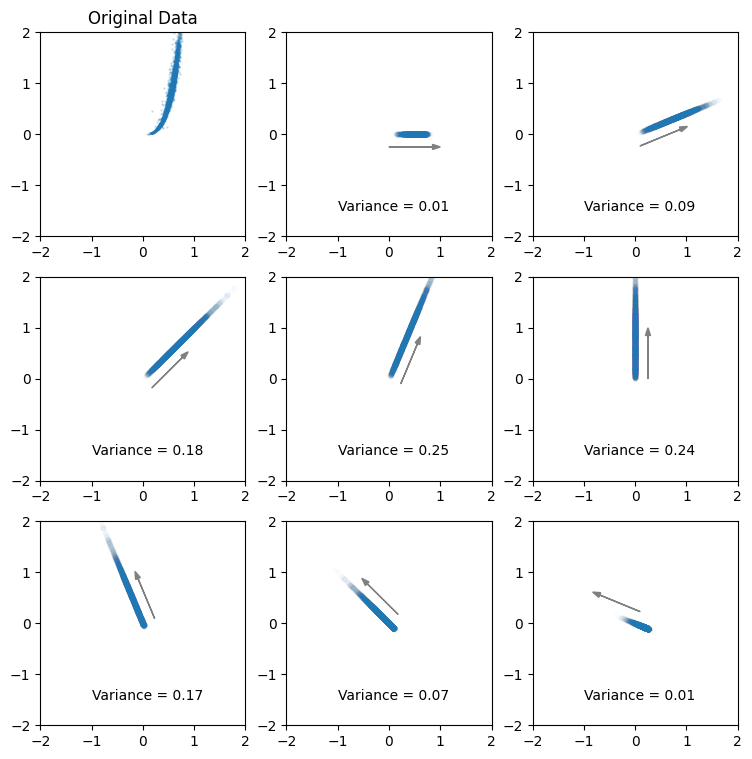

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")

plt.figure(figsize=(9, 9))

window_range = 2.0

plt.subplot(3, 3, 1)
plt.scatter(abalone["Length"], abalone["Whole_weight"], s=0.5, alpha=0.2)
plt.gca().set_xlim(-window_range, window_range)
plt.gca().set_ylim(-window_range, window_range)
plt.title("Original Data")

def plot_projection(plot_index, theta):
    plt.subplot(3, 3, plot_index)

    # rescale to unit vector
    x_dir = math.cos(theta)
    y_dir = math.sin(theta)

    plt.arrow(0.25 * y_dir, -0.25 * x_dir, x_dir, y_dir, color="grey", head_width=0.1, length_includes_head=True)

    plt.gca().set_xlim(-window_range, window_range)
    plt.gca().set_ylim(-window_range, window_range)

    coordinates = abalone["Length"] * x_dir + abalone["Whole_weight"] * y_dir
    plt.scatter(coordinates * x_dir, coordinates * y_dir, s=10, alpha=0.01)

    plt.annotate(f"Variance = {np.var(coordinates):.2f}", (-1, -1.5))


plot_projection(2, math.pi * 0.000)
plot_projection(3, math.pi * 0.125)
plot_projection(4, math.pi * 0.250)
plot_projection(5, math.pi * 0.375)
plot_projection(6, math.pi * 0.500)
plot_projection(7, math.pi * 0.625)
plot_projection(8, math.pi * 0.750)
plot_projection(9, math.pi * 0.875)

None

Script:
* In two dimensions, it is relatively easy to see how principal components work.
* The rotating axis illustrates potential directions for the first principal component.
* Each point is projected to the closest point on that axes, so you can see how much of that point's location is explained by the axis.
* Each of those projected points can be assigned a coordinate by their position on that axis.
* Usually we call the point where the average row would be projected zero, and measure from there.
* Then we calculate the variance of those coordinates, and call that the variance in that direction.